<a href="https://colab.research.google.com/github/jeongminia/NLP_paper_study/blob/main/1101_KETI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Import Library

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from wordcloud import WordCloud


import warnings
warnings.filterwarnings(action='ignore')

In [3]:
!apt-get install fonts-nanum*
!apt-get install fontconfig

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fontconfig is already the newest version (2.13.1-4.2ubuntu5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [4]:
!apt-get -qq install fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

In [5]:
!pip install konlpy

In [6]:
from konlpy.tag import Okt
okt = Okt()

# DATA 1-1. Korean HateSpeech Dataset

social bias : gender, others, none

hate speech : hate, offensive, none

In [7]:
!pip install koco

In [8]:
import koco

kohate_df = koco.load_dataset('korean-hate-speech', mode='train_dev')
train_data = kohate_df['train']

# 필요한 필드들만 추출하여 데이터프레임 생성
data = {
    'bias': [item['bias'] for item in train_data],
    'hate': [item['hate'] for item in train_data],
    'news_title': [item['news_title'] for item in train_data],
    'comments': [item['comments'] for item in train_data],
 #   'contain_gender_bias': [item['contain_gender_bias'] for item in train_data]
}

kohate_df = pd.DataFrame(data)
kohate_df

,bias,hate,news_title,comments
0,others,hate,"""밤새 조문 행렬…故 전미선, 동료들이 그리워하는 따뜻한 배우 [종합]""",(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...
1,none,none,"""'연중' 故 전미선, 생전 마지막 미공개 인터뷰…환하게 웃는 모습 '먹먹'[종합]""",....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...
2,none,hate,"""[단독] 잔나비, 라디오 출연 취소→'한밤' 방송 연기..비판 여론 ing(종합)""","...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래..."
3,none,none,"""'아스달 연대기' 장동건-김옥빈, 들끓는 '욕망커플'→눈물범벅 '칼끝 대립'""","1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데"
4,gender,hate,[DA:이슈] ‘구하라 비보’ 최종범 항소심에 영향?…법조계 “‘공소권 없음’ 아냐”,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...
...,...,...,...,...
7891,none,none,"""허지웅, 허투루 넘길 말 없었다…솔직하게 드러냈던 속사정""",힘내세요~ 응원합니다!!
7892,none,none,"""이혜경, ‘오! 캐롤’ 공연 중 남편 오정욱 부고…오열 속 발인 [종합]""",힘내세요~~삼가 고인의 명복을 빕니다..
7893,none,none,"""'설경구♥' 송윤아, 아들과 즐거운 하루 """"전 엄마니까요""""""",힘내세용 ^^ 항상 응원합니닷 ^^ !
7894,none,none,"""[SC현장]""""연예인 인생 협박 유감""""…미소잃은 최민수, '보복운전 혐의' 2차...",힘내소...연기로 답해요.나도 53살 인데 이런일 저런일 다 있더라구요.인격을 믿습...


In [9]:
kohate_df.bias.unique(), kohate_df.hate.unique()

(array(['others', 'none', 'gender'], dtype=object),
 array(['hate', 'none', 'offensive'], dtype=object))

In [10]:
kohate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7896 entries, 0 to 7895
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bias        7896 non-null   object
 1   hate        7896 non-null   object
 2   news_title  7896 non-null   object
 3   comments    7896 non-null   object
dtypes: object(4)
memory usage: 246.9+ KB


In [11]:
kohate_df.describe()

,bias,hate,news_title,comments
count,7896,7896,7896,7896
unique,3,3,1478,7896
top,none,none,"""'같이 살래요' 유동근, 장미희에 """"해아 물산 며느리, 내 딸이다""""""",(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...
freq,5148,3486,13,1


## EDA

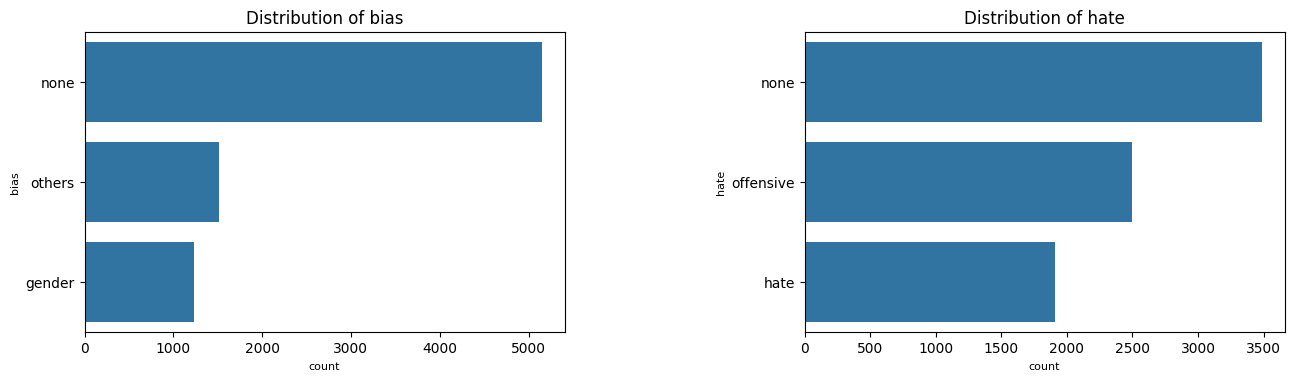

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.9, top=0.8, wspace=0.5)

g = sns.countplot(y="bias", data=kohate_df, order=kohate_df['bias'].value_counts().index, ax=axes[0])
axes[0].set_xlabel(g.get_xlabel(), fontsize=8)
axes[0].set_ylabel(g.get_ylabel(), fontsize=8)
axes[0].set_title('Distribution of bias')

g = sns.countplot(y="hate", data=kohate_df, order=kohate_df['hate'].value_counts().index, ax=axes[1])
axes[1].set_xlabel(g.get_xlabel(), fontsize=8)
axes[1].set_ylabel(g.get_ylabel(), fontsize=8)
axes[1].set_title('Distribution of hate')

plt.show()


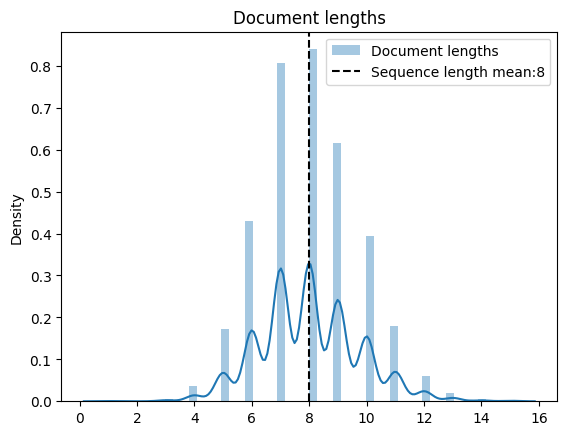

 가장 긴 문장은 15 개의 단어
 가장 짧은 문장은 1 개의 단어


In [13]:
kohate_df['doc_len'] = kohate_df.news_title.apply(lambda words: len(words.split()))

def plot_doc_lengths(dataframe):
    mean_seq_len = np.round(dataframe.doc_len.mean()).astype(int)
    sns.distplot(tuple(dataframe.doc_len), hist=True, kde=True, label='Document lengths')
    plt.axvline(x=mean_seq_len, color='k', linestyle='--', label=f'Sequence length mean:{mean_seq_len}')
    plt.title('Document lengths')
    plt.legend()
    plt.show()
    print(f" 가장 긴 문장은 {kohate_df['doc_len'].max()} 개의 단어\n 가장 짧은 문장은 {kohate_df['doc_len'].min()} 개의 단어")

plot_doc_lengths(kohate_df)

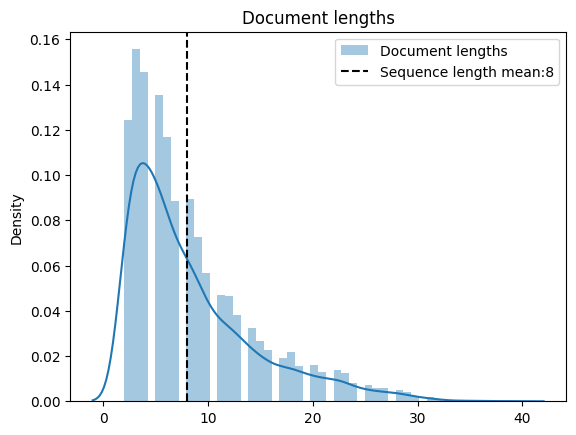

 가장 긴 문장은 39 개의 단어
 가장 짧은 문장은 2 개의 단어


In [14]:
# comments
kohate_df['doc_len'] = kohate_df.comments.apply(lambda words: len(words.split()))
plot_doc_lengths(kohate_df)

In [15]:
import re
def clean_text(sent):
  sent_clean = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\s]", " ", sent)
  return sent_clean

In [16]:
kohate_df['cleaned_comments'] = kohate_df['comments'].apply(lambda x : clean_text(x))
kohate_df_text = kohate_df['cleaned_comments'].tolist()

token_sentences = [okt.nouns(text) for text in kohate_df_text]
counter = Counter()
for title in token_sentences:
  counter.update(title)

(-0.5, 399.5, 199.5, -0.5)

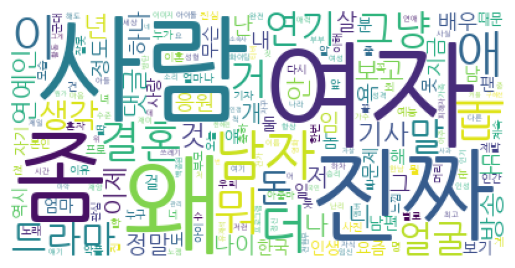

In [17]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter)
plt.imshow(cloud)
plt.axis('off')

# DATA 1-2. DACON 문장 유형 분류 AI 경진대회

문장 : 샘플 별 한개의 문장

유형 : 문장의 유형 (사실형, 추론형, 대화형, 예측형)

극성 : 문장의 극성 (긍정, 부정, 미정)

시제 : 문장의 시제 (과거, 현재, 미래)

In [18]:
sent_df = pd.read_csv('/content/sentenece_type_classification.csv')
sent_df = sent_df[['문장', '유형', '극성', '시제']]
sent_df.columns = ['sentence', 'sen_type', 'pos_neg', 'tense']

type_dict = {"사실형" : "real", "추론형" : "guess", "대화형" : "talk", "예측형" : "predict"}
polarity_dict = {"긍정" : "p", "부정" : "n" , "미정" : "o"}
tense_dict = {"과거" : "past", "미래" : "future", "현재" : "present"}

sent_df['sen_type'] = sent_df['sen_type'].apply(lambda x : type_dict[x])
sent_df['pos_neg'] = sent_df['pos_neg'].apply(lambda x : polarity_dict[x])
sent_df['tense'] = sent_df['tense'].apply(lambda x : tense_dict[x])
sent_df

,sentence,sen_type,pos_neg,tense
0,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,real,p,present
1,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,real,p,past
2,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,real,p,future
3,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",real,p,past
4,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,real,p,present
...,...,...,...,...
16536,"＇신동덤＇은 ＇신비한 동물사전＇과 ＇해리 포터＇ 시리즈를 잇는 마법 어드벤처물로, ...",real,p,past
16537,"수족냉증은 어릴 때부터 심했으며 관절은 어디 한 곳이 아니고 목, 어깨, 팔꿈치, ...",real,p,past
16538,김금희 소설가는 ＂계약서 조정이 그리 어려운가 작가를 격려한다면서 그런 문구 하나 ...,real,p,past
16539,1만명이 넘는 방문자수를 기록한 이번 전시회는 총 77개 작품을 넥슨 사옥을 그대로...,real,p,past


In [19]:
sent_df.sen_type.unique(), sent_df.pos_neg.unique(), sent_df.tense.unique()

(array(['real', 'guess', 'predict', 'talk'], dtype=object),
 array(['p', 'n', 'o'], dtype=object),
 array(['present', 'past', 'future'], dtype=object))

In [20]:
sent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16541 entries, 0 to 16540
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  16541 non-null  object
 1   sen_type  16541 non-null  object
 2   pos_neg   16541 non-null  object
 3   tense     16541 non-null  object
dtypes: object(4)
memory usage: 517.0+ KB


In [21]:
sent_df.describe()

,sentence,sen_type,pos_neg,tense
count,16541,16541,16541,16541
unique,16506,4,3,3
top,이들 게임은 국내 구글 플레이 매출 톱10 진입이 예상되는 기대작이다.,real,p,past
freq,2,13558,15793,8032


## EDA

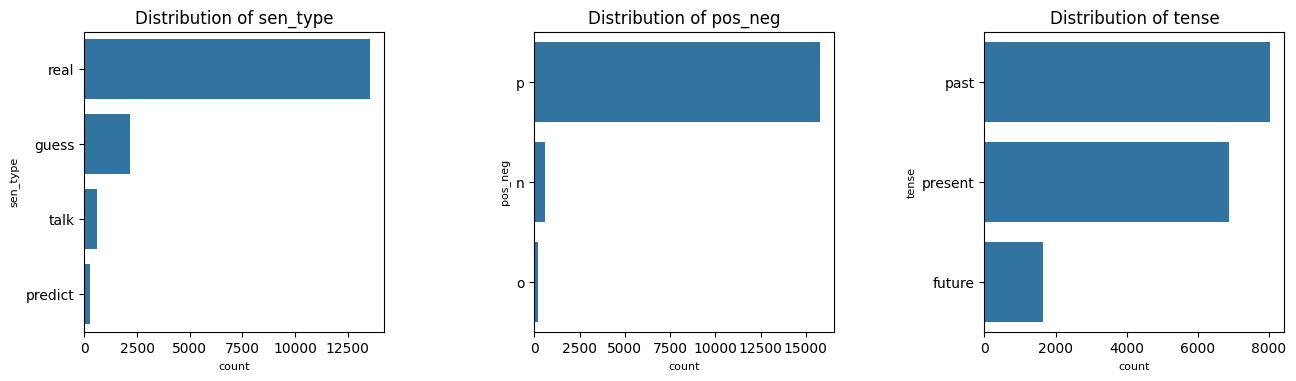

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.9, top=0.8, wspace=0.5)

g = sns.countplot(y="sen_type", data=sent_df, order=sent_df['sen_type'].value_counts().index, ax=axes[0])
axes[0].set_xlabel(g.get_xlabel(), fontsize=8)
axes[0].set_ylabel(g.get_ylabel(), fontsize=8)
axes[0].set_title('Distribution of sen_type')

g = sns.countplot(y="pos_neg", data=sent_df, order=sent_df['pos_neg'].value_counts().index, ax=axes[1])
axes[1].set_xlabel(g.get_xlabel(), fontsize=8)
axes[1].set_ylabel(g.get_ylabel(), fontsize=8)
axes[1].set_title('Distribution of pos_neg')

g = sns.countplot(y="tense", data=sent_df, order=sent_df['tense'].value_counts().index, ax=axes[2])
axes[2].set_xlabel(g.get_xlabel(), fontsize=8)
axes[2].set_ylabel(g.get_ylabel(), fontsize=8)
axes[2].set_title('Distribution of tense')

plt.show()

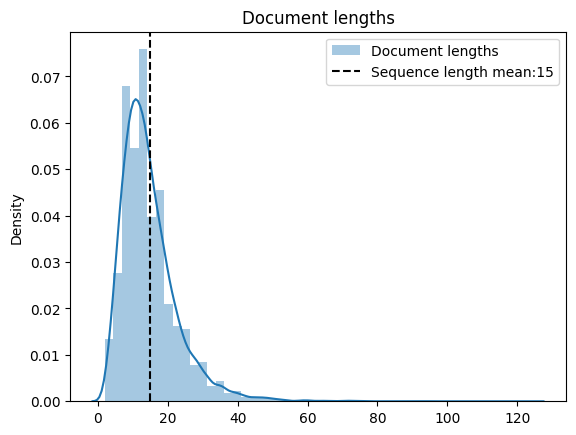

 가장 긴 문장은 124 개의 단어
 가장 짧은 문장은 2 개의 단어


In [23]:
sent_df['doc_len'] = sent_df.sentence.apply(lambda words: len(words.split()))

def plot_doc_lengths(dataframe):
    mean_seq_len = np.round(dataframe.doc_len.mean()).astype(int)
    sns.distplot(tuple(dataframe.doc_len), hist=True, kde=True, label='Document lengths')
    plt.axvline(x=mean_seq_len, color='k', linestyle='--', label=f'Sequence length mean:{mean_seq_len}')
    plt.title('Document lengths')
    plt.legend()
    plt.show()
    print(f" 가장 긴 문장은 {sent_df['doc_len'].max()} 개의 단어\n 가장 짧은 문장은 {sent_df['doc_len'].min()} 개의 단어")

plot_doc_lengths(sent_df)

In [24]:
sent_df['cleaned_sentence'] = sent_df['sentence'].apply(lambda x : clean_text(x))
sent_df_text = sent_df['cleaned_sentence'].tolist()

token_sentences = [okt.nouns(text) for text in sent_df_text]
counter = Counter()
for title in token_sentences:
  counter.update(title)

(-0.5, 399.5, 199.5, -0.5)

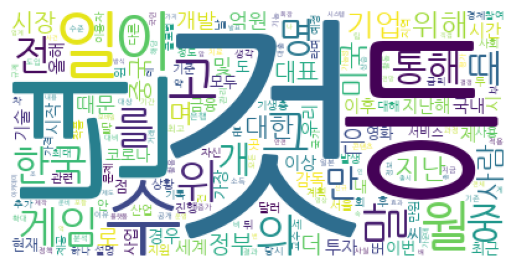

In [25]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter)
plt.imshow(cloud)
plt.axis('off')

# 2-1. TF-IDF

- Counte-based Representation 벡터화 : 단어가 문서(혹은 문장)에 등장하는 횟수를 기반으로 벡터화 하는 방법

각 데이터셋의 comments와 sentence 컬럼을 TF-IDF로 벡터화한 후 코사인 유사도를 계산하여 유사성을 평가

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
comments_tfidf = vectorizer.fit_transform(kohate_df['comments'])
sentences_tfidf = vectorizer.transform(sent_df['sentence'])  # 같은 벡터 공간으로 변환

In [27]:
# 코사인 유사도 계산
similarity_matrix = cosine_similarity(comments_tfidf, sentences_tfidf)
similarity_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

데이터를 시각화하여 두 데이터셋의 차이와 유사성을 좀 더 직관적으로 파악

=> 메모리사용이 너무 커서 랜덤하게 진행

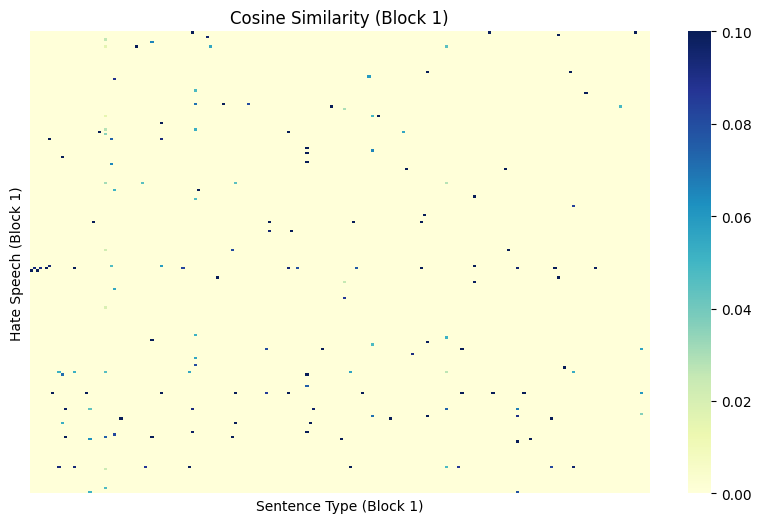

In [39]:
# 블록 크기 설정
block_size = 200  # 한 번에 처리할 데이터 개수

# 첫 번째 블록의 유사도만 계산
similarity_block = cosine_similarity(comments_tfidf[:block_size], sentences_tfidf[:block_size])

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(similarity_block,vmax=0.1, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity (Block 1)")
plt.xlabel("Sentence Type (Block 1)")
plt.ylabel("Hate Speech (Block 1)")
plt.show()

 t-SNE을 사용해 고차원 벡터를 2차원으로 축소하고, 두 데이터셋의 클러스터링을 시각화

 => 두 데이터셋 간의 전반적인 클러스터링 차이를 확인하는 데 유용

In [ ]:
# t-SNE로 차원 축소
'''from sklearn.manifold import TSNE

tfidf_combined = np.vstack([comments_tfidf.toarray(), sentences_tfidf.toarray()])
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tfidf_combined)'''

In [ ]:
'''plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:len(kohate_df), 0], tsne_results[:len(kohate_df), 1], label="Hate Speech", alpha=0.5)
plt.scatter(tsne_results[len(kohate_df):, 0], tsne_results[len(kohate_df):, 1], label="Sentence Type", alpha=0.5)
plt.legend()
plt.title("t-SNE Visualization of TF-IDF Vectors")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()'''

# 2-2. Word2Vec

- Distributed Representation : 타겟 단어 주변에 있는 단어를 벡터화 하는 방법

In [28]:
from gensim.models import Word2Vec
import numpy as np

# Word2Vec 모델 학습
sentences = [comment.split() for comment in kohate_df['comments']] + [sentence.split() for sentence in sent_df['sentence']]
model = Word2Vec(sentences,
                 vector_size=100,
                 window=5,
                 min_count=1,
                 workers=4
                 )

In [40]:
# 문장 벡터 평균 계산 함수
def sentence_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

# 각 데이터셋의 문장 벡터 생성
kohate_vectors = np.array([sentence_vector(comment, model) for comment in kohate_df['comments']])
sent_vectors = np.array([sentence_vector(sentence, model) for sentence in sent_df['sentence']])

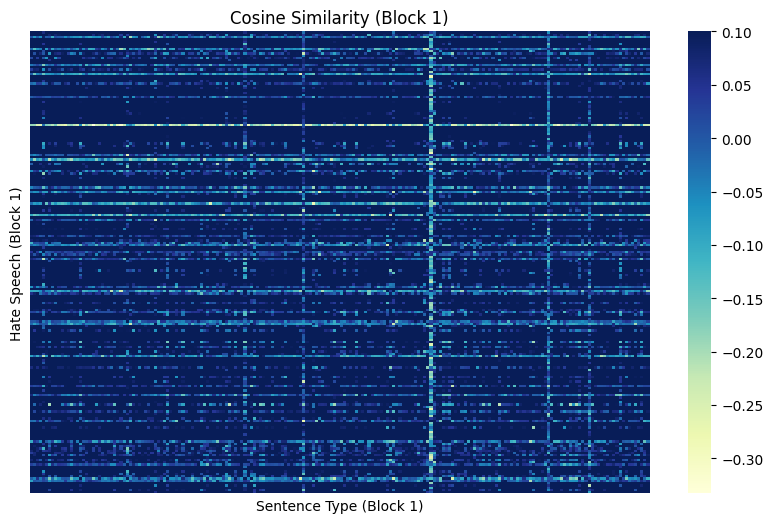

In [41]:
# 블록 크기 설정
block_size = 200  # 한 번에 처리할 데이터 개수

# 첫 번째 블록의 유사도만 계산
similarity_block = cosine_similarity(kohate_vectors[:block_size], sent_vectors[:block_size])

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(similarity_block,vmax=0.1, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity (Block 1)")
plt.xlabel("Sentence Type (Block 1)")
plt.ylabel("Hate Speech (Block 1)")
plt.show()

Word2Vec은 같은 문맥에서 자주 등장하는 단어들에 대해 유사한 벡터를 생성하므로, 비교적 낮은 유사도에서도 유사한 단어들이 다수 존재

# 2-3 Sentence-BERT

https://github.com/snunlp/KR-SBERT

데이터가 너무 커서 일부만 선택

In [47]:
from sentence_transformers import SentenceTransformer, util
import torch

# Korean-SBERT 모델 로드
model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')

num_samples = 500  # 샘플 개수 설정
kohate_comments = kohate_df['comments'].sample(num_samples, random_state=42).tolist()
sentences = sent_df['sentence'].sample(num_samples, random_state=42).tolist()

# 텍스트 임베딩 생성
kohate_embeddings = model.encode(kohate_comments, convert_to_tensor=True)
sentence_embeddings = model.encode(sentences, convert_to_tensor=True)

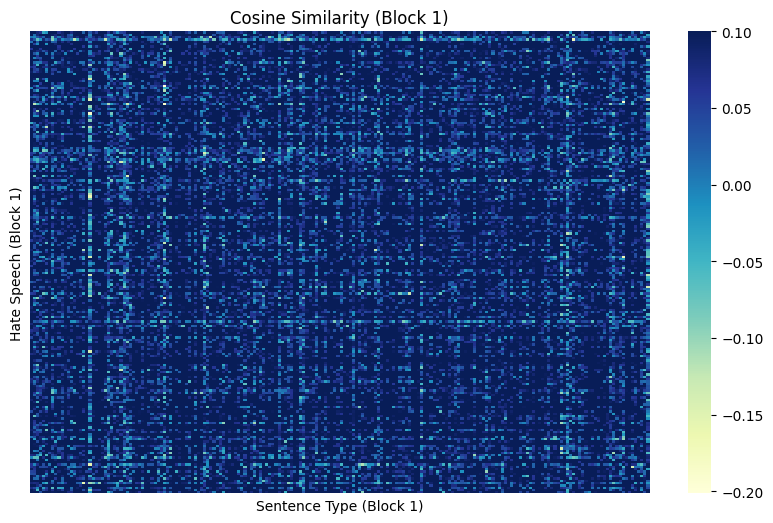

In [48]:
# 블록 크기 설정
block_size = 200  # 한 번에 처리할 데이터 개수

# 첫 번째 블록의 유사도만 계산
similarity_block = cosine_similarity(kohate_embeddings[:block_size], sentence_embeddings[:block_size])

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(similarity_block,vmax=0.1, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity (Block 1)")
plt.xlabel("Sentence Type (Block 1)")
plt.ylabel("Hate Speech (Block 1)")
plt.show()

# 2-4. 한국어전용토크나이저 적용한 SBERT

In [51]:
from konlpy.tag import Okt

okt = Okt()

# Korean-SBERT 모델 로드
model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')

In [ ]:
# Mecab을 이용해 토큰화 후 Korean-SBERT 모델로 임베딩 생성
def embed_texts(texts):
    tokenized_texts = [" ".join(mecab.morphs(text)) for text in texts]  # 형태소 단위로 토크나이징
    embeddings = model.encode(tokenized_texts, convert_to_tensor=True)
    return embeddings


num_samples = 500  # 샘플 개수 설정
kohate_comments = kohate_df['comments'].sample(num_samples, random_state=42).tolist()
sentences = sent_df['sentence'].sample(num_samples, random_state=42).tolist()

In [ ]:
# 코사인 유사도 계산
similarity_matrix = util.cos_sim(kohate_embeddings, sentence_embeddings).cpu().numpy()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(similarity_matrix, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity between Hate Speech and Sentence Type Datasets (Full Data with Mecab Tokenization)")
plt.xlabel("Sentence Type")
plt.ylabel("Hate Speech")
plt.show()